## Overview

The sinking of the Titanic is one of the most infamous shipwrecks in history.

On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew.

While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.

In this challenge, we ask you to build a predictive model that answers the question: “what sorts of people were more likely to survive?” using passenger data (ie name, age, gender, socio-economic class, etc).

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

import warnings
warnings.filterwarnings("ignore")

### Loading Dataset

In [2]:
df=pd.read_csv('titanic_data.csv')

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### Numerical Value Analysis

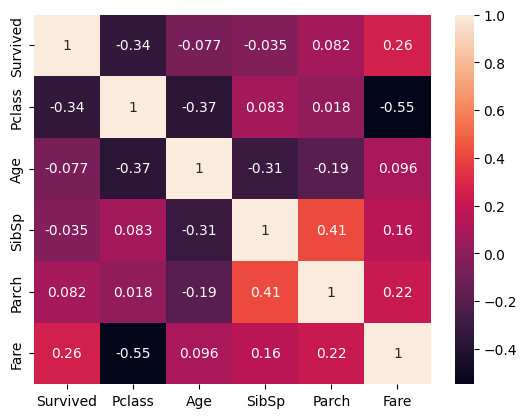

In [7]:
heatmap=sns.heatmap(df[['Survived','Pclass','Age','SibSp','Parch','Fare']].corr(),annot=True)

In [8]:
df['SibSp'].unique()

array([1, 0, 3, 4, 2, 5, 8], dtype=int64)

<AxesSubplot:xlabel='SibSp', ylabel='Survived'>

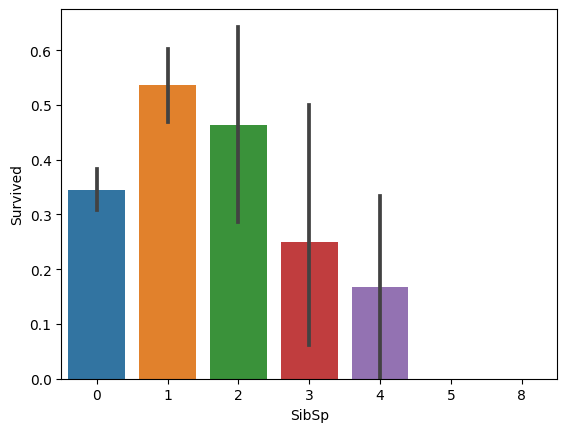

In [9]:
sns.barplot(x="SibSp",y="Survived",data=df)

People having 1 or 2 siblings had the most probability of surviving

In [10]:
df['Age'].unique()

array([22.  , 38.  , 26.  , 35.  ,   nan, 54.  ,  2.  , 27.  , 14.  ,
        4.  , 58.  , 20.  , 39.  , 55.  , 31.  , 34.  , 15.  , 28.  ,
        8.  , 19.  , 40.  , 66.  , 42.  , 21.  , 18.  ,  3.  ,  7.  ,
       49.  , 29.  , 65.  , 28.5 ,  5.  , 11.  , 45.  , 17.  , 32.  ,
       16.  , 25.  ,  0.83, 30.  , 33.  , 23.  , 24.  , 46.  , 59.  ,
       71.  , 37.  , 47.  , 14.5 , 70.5 , 32.5 , 12.  ,  9.  , 36.5 ,
       51.  , 55.5 , 40.5 , 44.  ,  1.  , 61.  , 56.  , 50.  , 36.  ,
       45.5 , 20.5 , 62.  , 41.  , 52.  , 63.  , 23.5 ,  0.92, 43.  ,
       60.  , 10.  , 64.  , 13.  , 48.  ,  0.75, 53.  , 57.  , 80.  ,
       70.  , 24.5 ,  6.  ,  0.67, 30.5 ,  0.42, 34.5 , 74.  ])

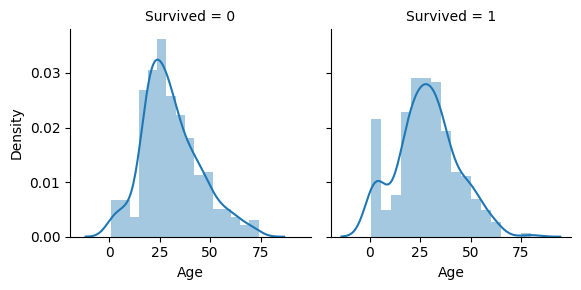

In [11]:
age_vis=sns.FacetGrid(df,col='Survived')
age_vis=age_vis.map(sns.distplot,'Age')

In [12]:
df['Sex'].unique()

array(['male', 'female'], dtype=object)

<AxesSubplot:xlabel='Sex', ylabel='Survived'>

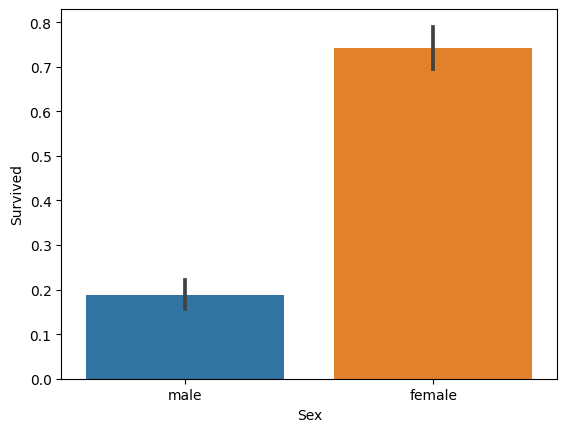

In [13]:
sns.barplot(x="Sex",y="Survived",data=df)

In [14]:
df.groupby('Sex').mean()['Survived']

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

Females were having more chance of survival

In [15]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [16]:
df['Pclass'].unique()

array([3, 1, 2], dtype=int64)

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

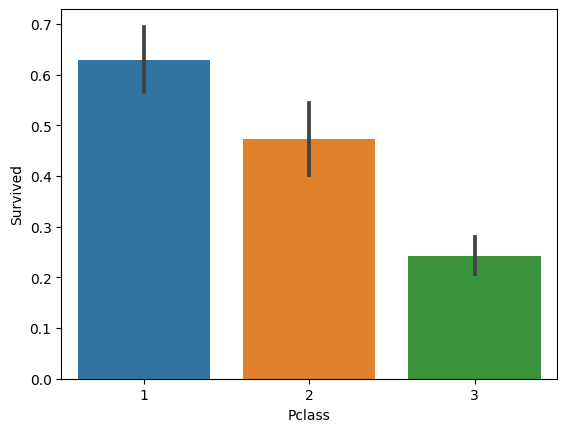

In [17]:
sns.barplot(x="Pclass",y="Survived",data=df)

Those who were elite (1st class) were given most priority 

In [18]:
df['Embarked'].isnull().sum()

2

In [19]:
df.groupby('Embarked').size()

Embarked
C    168
Q     77
S    644
dtype: int64

In [20]:
df['Embarked']=df['Embarked'].fillna('S')

In [21]:
df['Embarked'].isnull().sum()

0

<AxesSubplot:xlabel='Embarked', ylabel='Survived'>

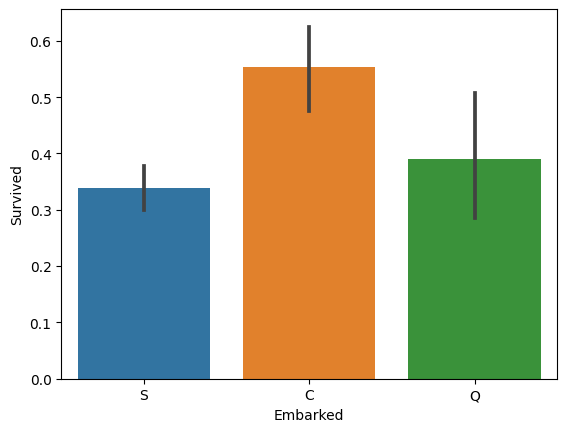

In [22]:
sns.barplot(x='Embarked',y='Survived',data=df)

<AxesSubplot:xlabel='Embarked', ylabel='count'>

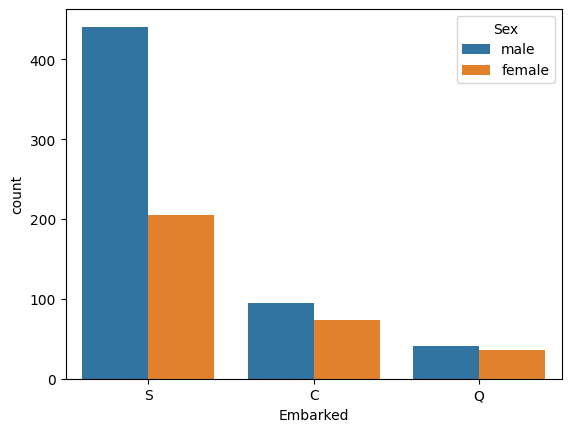

In [23]:
sns.countplot(x='Embarked',hue='Sex',data=df)

<AxesSubplot:xlabel='Embarked', ylabel='count'>

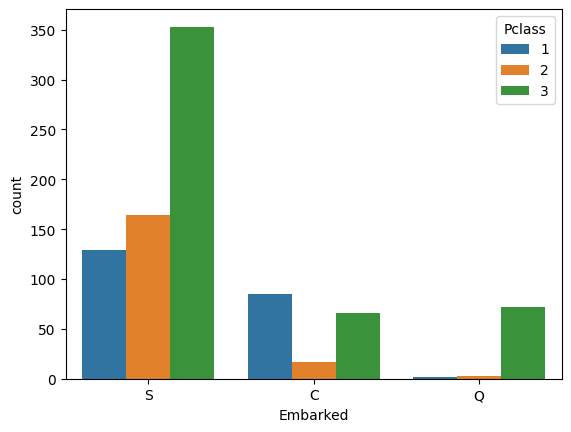

In [24]:
sns.countplot(x='Embarked',hue='Pclass',data=df)

# Preparing Data

In [25]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [26]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [27]:
mean=df['Age'].mean()
sd=df['Age'].std()

is_null=df['Age'].isnull().sum()

In [28]:
print(mean,sd,is_null)

29.69911764705882 14.526497332334042 177


In [29]:
rand_age=np.random.randint(mean-sd,mean+sd,size=is_null)

In [30]:
rand_age

array([41, 37, 17, 30, 41, 36, 39, 27, 39, 39, 30, 27, 27, 33, 36, 31, 21,
       34, 15, 22, 43, 18, 23, 39, 24, 17, 41, 21, 33, 39, 21, 41, 40, 35,
       35, 30, 29, 23, 40, 30, 33, 34, 19, 16, 42, 34, 38, 29, 40, 29, 35,
       18, 15, 27, 35, 42, 41, 34, 31, 29, 33, 38, 22, 23, 25, 42, 37, 42,
       43, 19, 35, 36, 33, 35, 42, 15, 39, 43, 42, 15, 32, 24, 23, 41, 37,
       38, 29, 18, 25, 16, 31, 33, 24, 16, 34, 29, 16, 23, 23, 38, 37, 43,
       23, 25, 37, 40, 31, 23, 25, 35, 38, 19, 16, 16, 30, 43, 30, 38, 33,
       42, 15, 41, 21, 35, 22, 18, 30, 29, 31, 27, 40, 42, 15, 24, 41, 43,
       25, 28, 43, 34, 32, 36, 27, 39, 36, 19, 15, 30, 29, 29, 30, 33, 32,
       23, 17, 26, 19, 37, 33, 29, 29, 30, 19, 36, 22, 39, 24, 22, 26, 43,
       30, 24, 26, 33, 31, 16, 36])

In [31]:
a=df['Age'].copy()
a[np.isnan(a)]=rand_age
df['Age']=a

In [32]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [43]:
del df['PassengerId']

In [44]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [45]:
gender={"male":0,"female":1}
df['Sex']=df['Sex'].map(gender)

In [46]:
ports={"S":0,"C":1,"P":2}
df['Embarked']=df['Embarked'].map(ports)

In [120]:
df['Embarked']=df['Embarked'].fillna(1.0)
df.head(30)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,0.0
1,1,1,1,38.0,1,0,71.2833,1.0
2,1,3,1,26.0,0,0,7.9250,0.0
3,1,1,1,35.0,1,0,53.1000,0.0
4,0,3,0,35.0,0,0,8.0500,0.0
5,0,3,0,41.0,0,0,8.4583,1.0
6,0,1,0,54.0,0,0,51.8625,0.0
7,0,3,0,2.0,3,1,21.0750,0.0
8,1,3,1,27.0,0,2,11.1333,0.0
9,1,2,1,14.0,1,0,30.0708,1.0


# Splitting of data

In [121]:
x=df.iloc[:,1:]
y=df['Survived']

In [122]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.30,random_state=0)

# Scaling

In [123]:
from sklearn.preprocessing import StandardScaler
sc_x=StandardScaler()
xtrain=sc_x.fit_transform(xtrain)
xtest=sc_x.transform(xtest)

# Classification

In [124]:
logreg=LogisticRegression()
svc_classifier=SVC()
dt_classifier=DecisionTreeClassifier()
knn_classifier=KNeighborsClassifier(5)
rf_classifier=RandomForestClassifier(n_estimators=1000)

In [129]:
logreg.fit(xtrain,ytrain)
svc_classifier.fit(xtrain,ytrain)
dt_classifier.fit(xtrain,ytrain)
knn_classifier.fit(xtrain,ytrain)
rf_classifier.fit(xtrain,ytrain)

RandomForestClassifier(n_estimators=1000)

In [130]:

logreg_ypred = logreg.predict(xtest)
svc_classifier_ypred = svc_classifier.predict(xtest)
dt_classifier_ypred = dt_classifier.predict(xtest)
knn_classifier_ypred = knn_classifier.predict(xtest)
rf_classifier_ypred = rf_classifier.predict(xtest)

In [131]:
from sklearn.metrics import accuracy_score

logreg_acc = accuracy_score(ytest, logreg_ypred)
svc_classifier_acc = accuracy_score(ytest, svc_classifier_ypred)
dt_classifier_acc = accuracy_score(ytest, dt_classifier_ypred)
knn_classifier_acc = accuracy_score(ytest, knn_classifier_ypred)
rf_classifier_acc = accuracy_score(ytest, rf_classifier_ypred)

In [132]:
print ("Logistic Regression : ", round(logreg_acc*100, 2))
print ("Support Vector      : ", round(svc_classifier_acc*100, 2))
print ("Decision Tree       : ", round(dt_classifier_acc*100, 2))
print ("K-NN Classifier     : ", round(knn_classifier_acc*100, 2))
print ("Random Forest       : ", round(rf_classifier_acc*100, 2))

Logistic Regression :  79.1
Support Vector      :  81.72
Decision Tree       :  77.61
K-NN Classifier     :  82.09
Random Forest       :  83.58
